In [19]:
# Turn on autocompleter
%config IPCompleter.greedy=True

In [20]:
import numpy as np

import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
%matplotlib inline
import helper

In [21]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5, ))
                            ])
trainset = datasets.MNIST('MNIST_data', download = True, train = True, transform = transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)

In [22]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim = 1)
        
        return x
        
model = Network()

In [23]:
# How to initialize weight manually
#model.fc1.weight.data.normal_(std = 0.01 )

In [24]:
dataiter =  iter(train_loader)
images, label = next(dataiter)

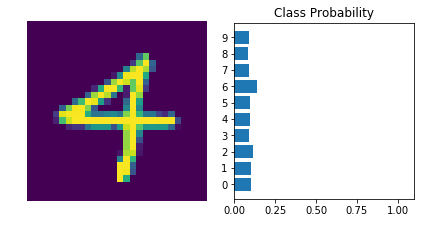

In [25]:
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0])
helper.view_classify(images[0].view(1, 28, 28), ps)